
<font size="4" style="color:red;"> **IMPORTANT: ** When submitting this notebook as homework, make sure you Only modify cells which have the following comment</font>

```python
# modify this cell
```

<font style="color:red;"> Do not add any new cells when submitting homework. To test out new code, use the coding **scratchpad** by clicking the triangular icon in the bottom right corner of the screen. (**hotkey:** control-B)  </font>


In [5]:
%pylab inline
from scipy import *
from numpy.linalg import norm
from math import sqrt,sin,cos
import pandas as pd
import numpy as np
from numpy import arange,array,ones,linalg

Populating the interactive namespace from numpy and matplotlib


/root/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['cos', 'sqrt', 'sin']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Regression

[Read this notebook](http://70.95.166.175:8888/notebooks/SAFETY/probability-and-statistics-using-python/notebooks/Week%209-%20RegressionPCA/4.Regression%20I.ipynb) 
before attempting exercises in this section.

It is now your turn to try out all of the above code. For this exercise you will measure the relationship between hours studyig and student grades for a simulated (*fake*) dataset. Below is a scatter plot of the data.

(1000, 2)


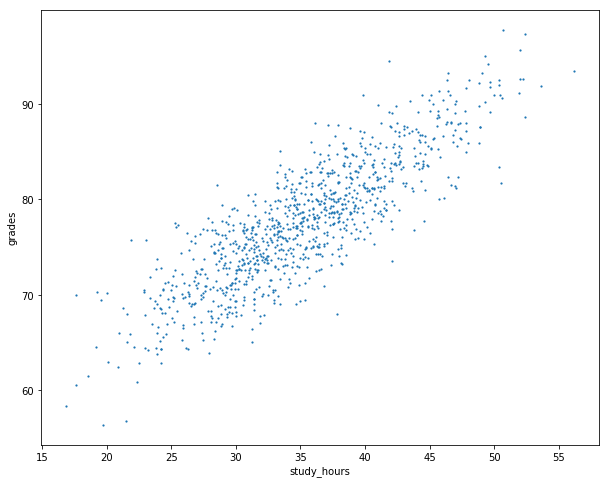

In [6]:
data = pd.read_csv('../data/hw/hw_regression_data.csv')
print data.shape
data.head()

ax= data.plot(kind='scatter',s=1.4,x="study_hours",y="grades",figsize=[10,8]);

## Exercise 1: Get Averages

Write a function, **get_averages**, that:
1. For all data points round the student's study hours to the nearest whole number.
2. Compute the mean grade for each rounded whole number of study hours.

The function should return a pandas dataframe of the mean grades for each existing rounded whole number. The beginning of the panda dataframe is provided for you below:

<font  style="color:blue"> * **Code:** *</font>
```python
grade_means = get_averages(data)

print type( grade_means )
print grade_means.shape
print grade_means.columns 
grade_means.head()
```

<font  style="color:magenta"> * **Output:** *</font>
```
<class 'pandas.core.frame.DataFrame'>
(38, 1)
Index([u'grades'], dtype='object')
```
<img src="../data/hw/reg_ex_table.png"  style="width: 190px;"/>

In [ ]:
# modify this cell

def get_averages(data):
    # input: the HW's dataset
    # output: a pandas dataframe yielding the mean grade for each rounded number of study hours
    
    ### BEGIN SOLUTION
    data['round_study_hours']=data['study_hours'].round()
    return data.groupby('round_study_hours').mean()[['grades']]
    ### END SOLUTION

In [ ]:
# check student function
grade_means = get_averages(data)

assert grade_means.shape == (38, 1)
assert str(type(grade_means)) == "<class 'pandas.core.frame.DataFrame'>"

try: assert grade_means.columns[0] == "grades"
except: raise ValueError('the column in "grade_means" must be named grades')

try: assert sum(abs( grade_means.tail()["grades"].values - \
               np.array([ 90.77739,90.02272,92.97258,91.87963,93.48365])    )) < 10**-4
except: raise ValueError('some values are incorrect in grade_means')
 

# plot Graph
ax= data.plot(kind='scatter',s=1.4,x="study_hours",y="grades",figsize=[10,8]);
grade_means.plot(y='grades',style='ro', ax=ax,legend=False)
_xlim = xlim()
_ylim =ylim()
for _x in arange(_xlim[0]+0.5,_xlim[1],1):
    plot([_x,_x],[_ylim[0],_ylim[1]],'g')

### BEGIN HIDDEN TESTS
assert sum(abs( grade_means["grades"][20:30].values - \
        array([64.74628137,65.6715546,65.25890137,68.44169892,67.90134068,70.61057739,69.79446048,  \
               71.09018443,71.72610072,72.67667563,72.63601539])   )) < 5*10**-4
### BEGIN HIDDEN TESTS

## Exercise 2: Simple Linear Regression

Write a function, **do_regression**, that performs linear regression to return 
$ \;
 {\bf w} = \begin{pmatrix}
 w_0\\
 w_1
 \end{pmatrix}
$
for the equation:

$$
\text{grades}= w_0 + w_1 \cdot \text{study_hours}
$$


<font  style="color:blue"> * **Code:** *</font>
```python
w = do_regression(data)
print type(w)
print w.shape
```

<font  style="color:magenta"> * **Output:** *</font>
```
<type 'numpy.ndarray'>
(2,)
```

In [ ]:
# modify this cell

def do_regression(data):
    # input: the HW's dataset
    # output: a numpy array yielding w=(w0,w1) from linear regression
    
    ### BEGIN SOLUTION
    A=np.array(data['study_hours'])
    A=np.array([ones(len(A)),A])
    y=np.array(data['grades'])
    return linalg.lstsq(A.T,y)[0]
    ### END SOLUTION

In [ ]:
# check student function
w1_hw = do_regression(data)
assert str(type(w1_hw)) ==  "<type 'numpy.ndarray'>"
assert w1_hw.shape == (2,)
assert abs(w1_hw[0] - 48.0694704904) < 10**-5

# plot Means
ax= data.plot(kind='scatter',s=1.4,x="study_hours",y="grades",figsize=[10,8]);
x0,x1=xlim()
ax.plot([x0,x1],[f(x0,w1_hw),f(x1,w1_hw)],'k');

### BEGIN HIDDEN TESTS
abs(w1_hw[1] - 0.840093766443) < 10**-5
### BEGIN HIDDEN TESTS

## Exercise 3: Reversed Regression

Write a function, **reverse_regression**, that again performs linear regression to return 
$ \;
 {\bf w} = \begin{pmatrix}
 w_0\\
 w_1
 \end{pmatrix}
$
but this time for:

$$
\text{study_hours}= w_0 + w_1 \cdot \text{grades}
$$


<font  style="color:blue"> * **Code:** *</font>
```python
w = reverse_regression(data)
print type(w)
print w.shape
```

<font  style="color:magenta"> * **Output:** *</font>
```
<type 'numpy.ndarray'>
(2,)
```

In [ ]:
# modify this cell

def reverse_regression(data):
    # input: the HW's dataset
    # output: a numpy array yielding w=(w0,w1) for the reversed linear regression
    
    ### BEGIN SOLUTION
    A=np.array(data['grades'])
    A=np.array([ones(len(A)),A])
    y=np.array(data['study_hours'])
    return linalg.lstsq(A.T,y)[0] 
    ### END SOLUTION

In [ ]:
# check answer
w2_hw = reverse_regression(data)
assert str(type(w2_hw)) ==  "<type 'numpy.ndarray'>"
assert w2_hw.shape == (2,)
assert abs(w2_hw[0] - -31.85141332) < 10**-5

# plot graph
ax= data.plot(kind='scatter',s=1.4,x="study_hours",y="grades",figsize=[10,8]);
x0,x1=xlim()
ax.plot([x0,x1],[f(x0,w1_hw),f(x1,w1_hw)],'k');
y0,y1=ylim()
ax.plot([f(y0,w2_hw),f(y1,w2_hw)],[y0,y1],'r');

### BEGIN HIDDEN TESTS
abs(w2_hw[1] - 0.86337634) < 10**-5
### END HIDDEN TESTS

# Regression to the Mean

[Read this notebook](http://70.95.166.175:8888/notebooks/SAFETY/probability-and-statistics-using-python/notebooks/Week%209-%20RegressionPCA/4.Regression%20I.ipynb) 
before attempting exercises in this section.

## Excercises

It is now your turn to do regression on a dataset. Consider $1000$ datapoints with random variables $x$ and $y$ both sampled from a normal (gaussian) distribution:
$$ x,y \text{ ~ } \mathcal{N}(0,1)  $$

Notice that the graph below looks like a blob, with no clear relationship between  $x$ and $y$. This leads intuitively to the idea that $x$ and $y$ are independent from each other. In this particualr case (not always true) this intuition is correct, $x$ and $y$ are mathematically independent variables.

If we were to try to perform linear regression on this data (the <font style="color:red">red line</font>), we would find rather boring results:
$$ y = 0 + 0 \cdot x = 0 $$

This is due to the fact that $y$ has mean 0 and is independent of $x$. What do you think would happen if we did:
$$ y-x = w_0 + w_1 \cdot x $$

Is $y$ independent of $x$? Will the graph look like a blob? Will $y-x = 0 ?$ Lets find out!

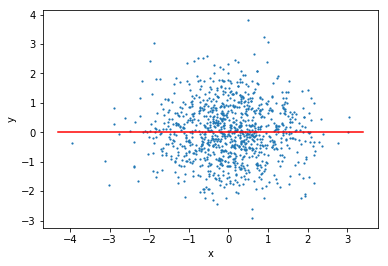

In [9]:
HW=pd.read_csv('../data/hw/gauss_R2.csv')

ax= HW.plot(kind='scatter',s=1.4,x="x",y="y");
x0,x1=xlim()
ax.plot([x0,x1],[0,0],'r');

## Exercise 1: Put $\;y-x\;$ in Dataframe

This first exercise's goal is to familarize you with the [pandas](http://pandas.pydata.org/pandas-docs/version/0.15.2/tutorials.html) package.

Your task is to make a new column on the pandas dataframe `HW` where each element of the new column is equal to $y-x$. Write a function **y_minus_x** that will create the new column, make sure the column's name is "y-x" . Notice that the function DOES NOT return any output, this is because the `HW` dataframe will be edited "in-place".

<font  style="color:blue"> * **Code:** *</font>
```python
print y_minus_x(HW)
print HW.shape
print HW.columns
HW.head()
```

<font  style="color:magenta"> * **Output:** *</font>
```
None
(1000, 3)
Index([u'x', u'y', u'y-x'], dtype='object')
```
<img src="../data/hw/reg_mean_pic.png"  style="width: 220px;"/>

In [ ]:
def y_minus_x(HW):
    # input: the HW's dataset
    # output: there is NO OUTPUT
    
    ### BEGIN SOLUTION
    HW["y-x"] = HW["y"] - HW["x"]
    ### END SOLUTION

In [ ]:
# Check Answer
HW=pd.read_csv('../data/hw/gauss_R2.csv')
assert y_minus_x(HW) == None 
assert HW.shape == (1000, 3)
assert all( HW.columns.values == array(['x', 'y', 'y-x']) )
assert sum(abs( array(HW["y-x"])[0:10] - \
               array([0.36236278,-2.37726552,-0.36501525,0.05449746,-0.27705517,1.80807383,-2.07001209,
                      -0.67536514,0.67519959,  0.97277652])   )) < 10**-5

# Create Graph
ax= HW.plot(kind='scatter',s=1.4,x="x",y="y-x",figsize=[10,8]);

### BEGIN HIDDEN TESTS
assert sum(abs( array(HW["y-x"])[60:70] - \
                array([-1.46231473, -0.35256032,  0.50213927, -2.98962366, -1.98911633,
                       1.19767907, -0.2104474 ,  1.71587283,  1.50967089, -0.37887511])    )) < 10**-5
### END HIDDEN TESTS

Notice in the graph that there is a clear negative relationship between $y-x$ and $x$. As you might have guessed, $y-x$ and $x$ are NOT independent. 

We can use linear regression to find the relationship between $y-x$ and $x$ but before we do that, we can derive this mathematicaly. Remember from before, we showed:
$$ y = 0 + 0 \cdot x $$

Now, we're doing linear regression to find:
$$ \;\;\;\;\;\;y-x = w_0 + w_1 \cdot x $$
$$ \iff y = w_0 + (1+w_1) \cdot x $$

Comparing the two eqations for $y$, you can deduce that $w_0=0$ and $w_1=-1$ . Now lets see how close our sampled data is to the true equation for the distribution!

$\;$
<font style="color:red">*Technical Note:*</font> The derivation is mathematically sound only because $y-x$ is also a gaussian random variable. The sum of two gaussians is a gaussian. Under the laws of linear regression this ensures both the regressors of $y$ and $y-x$ have zero expected error.

## Exercise 2: Simple Linear Regression

Write a function, **do_regression**, that performs linear regression to return 
$ \;
 {\bf w} = \begin{pmatrix}
 w_0\\
 w_1
 \end{pmatrix}
$
for the equation:

$$
\text{y-x}= w_0 + w_1 \cdot \text{x}
$$


<font  style="color:blue"> * **Code:** *</font>
```python
w = do_regression(HW)
print type(w)
print w.shape
```

<font  style="color:magenta"> * **Output:** *</font>
```
<type 'numpy.ndarray'>
(2,)
```

In [ ]:
# modify this cell

def do_regression(HW):
    # input: the HW's dataset
    # output: a numpy array yielding w=(w0,w1) from linear regression
    
    ### BEGIN SOLUTION
    A= array(HW['x'])
    A= array([ones(len(A)),A])
    y= array(HW['y-x'])
    return linalg.lstsq(A.T,y)[0]
    ### END SOLUTION

In [ ]:
# Check Answer
w_hw = do_regression(HW)
assert str(type(w_hw)) == "<type 'numpy.ndarray'>"
assert w_hw.shape == (2,)
assert sum(abs(w_hw[0] - 0.02173387)) < 10**-5

# Plot Graph
print "LINEAR REGRESSION EQUATION:"
print "y-x = {:.2f} + {:.2f} x".format(w_hw[0],w_hw[1])
ax= HW.plot(kind='scatter',s=1.4,x="x",y="y-x",figsize=[10,8]);
x0,x1=xlim()
ax.plot([x0,x1],[f(x0,w_hw),f(x1,w_hw)],'k');

### BEGIN HIDDEN TESTS
assert sum(abs(w_hw[1] - -1.01071279)) < 10**-5
### END HIDDEN TESTS

# Polynomial regression

[Read this notebook](http://70.95.166.175:8888/notebooks/SAFETY/probability-and-statistics-using-python/notebooks/Week%209-%20RegressionPCA/4.Regression%20I.ipynb) 
before attempting exercises in this section.

## Excercises

So far we have discussed polynomials in a **single** variable. Polynomials can be defined over several variables

Write a function that takes as input a two lists of $(x,y,z)$ points, a training set and a test set. The $x$ and $y$ values are drawn uniformly at random from the range $[0,100]$, The $z$ values are generated according to the distribution $y=g(x)+w$ where $g$ is a polynomial function whose degree is at most 10 and $w$ is independent gaussian noise.

The function should find the best fit polynomials of degrees 0 to 10 and compute for each degree the training RMS error and the test RMS error.

The function should return the polynomial which gives the best fit on the test set. For that polynomial it should return:
1. $d$ - The degree of the polinomial.
2. A vector of length $d+1$ corresponding to the coefficients $w_i$ of the polynomial, expressed as: $ \sum_{i=0}^d w_i x^i$
3. The RMS error on the training set.
4. The RMS error of the test set.

In [ ]:
def fit_poly(train,test):
    """ take as input a training set and a test set and output the 
    polynomial that is the best fit."""
    